In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('weekdays_datasets/df_timeseries.csv')
print(df.head())

   id  h00  h01  h02  h03  h04  h05       h06       h07       h08  ...  \
0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
1   1  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
2   2  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
3   3  0.0  0.0  0.0  0.0  0.0  0.0  0.080787  0.303251  0.519247  ...   
4   4  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.060529  0.172893  ...   

        h17       h18       h19       h20       h21  h22  h23  country  city  \
0  0.347754  0.522437  0.940441  0.823425  0.000000  0.0  0.0      0.0   0.0   
1  0.320058  0.212006  0.212006  0.212006  0.000000  0.0  0.0      0.0   0.0   
2  0.805263  0.483633  0.000000  0.000000  0.000000  0.0  0.0      0.0   0.0   
3  0.986970  0.917125  0.562874  0.378466  0.000000  0.0  0.0      0.0   0.0   
4  0.878997  0.994609  0.901742  0.667729  0.387283  0.0  0.0      0.0   0.0   

   category  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4   

In [15]:
G = nx.from_pandas_edgelist(df, 'city', 'category')

In [16]:
degree = dict(G.degree())
centrality = nx.degree_centrality(G)

print("Grau dos nós:")
print(degree)

print("\nCentralidade dos nós:")
print(centrality)

Grau dos nós:
{0.0: 6, 1.0: 6, 2.0: 6, 3.0: 4, 4.0: 6}

Centralidade dos nós:
{0.0: 1.5, 1.0: 1.5, 2.0: 1.5, 3.0: 1.0, 4.0: 1.5}


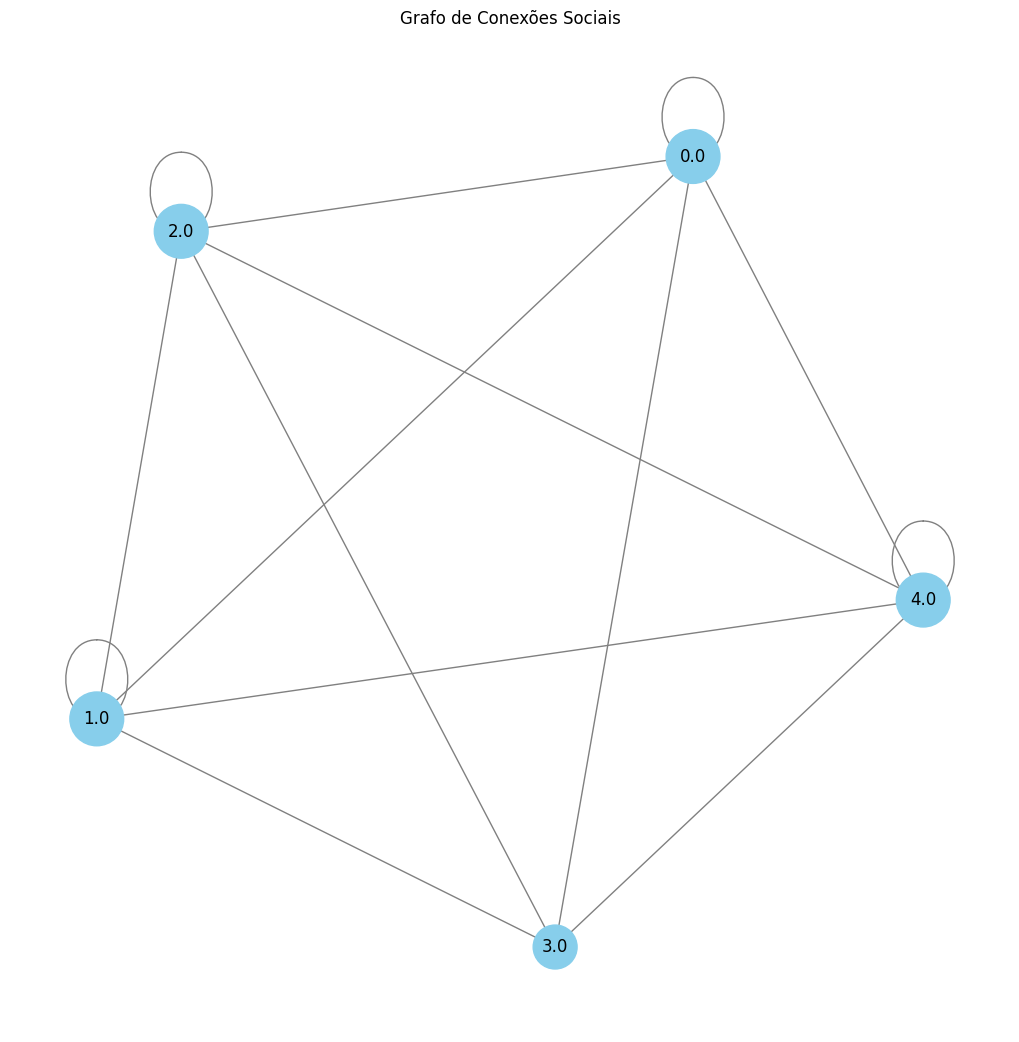

In [17]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=[v * 1000 for v in centrality.values()], node_color='skyblue', edge_color='gray')
plt.title('Grafo de Conexões Sociais')
plt.show()


In [19]:
densidade = nx.density(G)
print(f"Densidade do Grafo: {densidade}")


Densidade do Grafo: 1.4


In [20]:
if nx.is_connected(G):
    diametro = nx.diameter(G)
    print(f"Diâmetro do Grafo: {diametro}")
else:
    print("O grafo não é conectado, portanto, não tem um diâmetro definido.")


Diâmetro do Grafo: 1


In [21]:
if nx.is_connected(G):
    caminho_medio = nx.average_shortest_path_length(G)
    print(f"Caminho Médio: {caminho_medio}")
else:
    print("O grafo não é conectado, portanto, não tem um caminho médio definido.")


Caminho Médio: 1.0


In [22]:
coef_agrupamento = nx.clustering(G)
print("Coeficiente de Agrupamento:")
print(coef_agrupamento)

coef_agrupamento_medio = nx.average_clustering(G)
print(f"Coeficiente de Agrupamento Médio: {coef_agrupamento_medio}")


Coeficiente de Agrupamento:
{0.0: 1.0, 1.0: 1.0, 2.0: 1.0, 3.0: 1.0, 4.0: 1.0}
Coeficiente de Agrupamento Médio: 1.0


In [23]:
centralidade_grau = nx.degree_centrality(G)
centralidade_proximidade = nx.closeness_centrality(G)
centralidade_intermediacao = nx.betweenness_centrality(G)

print("Centralidade de Grau:")
print(centralidade_grau)

print("\nCentralidade de Proximidade:")
print(centralidade_proximidade)

print("\nCentralidade de Intermediação:")
print(centralidade_intermediacao)


Centralidade de Grau:
{0.0: 1.5, 1.0: 1.5, 2.0: 1.5, 3.0: 1.0, 4.0: 1.5}

Centralidade de Proximidade:
{0.0: 1.0, 1.0: 1.0, 2.0: 1.0, 3.0: 1.0, 4.0: 1.0}

Centralidade de Intermediação:
{0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0}


In [24]:
componentes_conectados = list(nx.connected_components(G))
print("Componentes Conectados:")
print(componentes_conectados)

num_componentes = nx.number_connected_components(G)
print(f"Número de Componentes Conectados: {num_componentes}")


Componentes Conectados:
[{0.0, 1.0, 2.0, 3.0, 4.0}]
Número de Componentes Conectados: 1
